In [1]:
import pandas as pd
import numpy as np

In [13]:
data=pd.read_csv('C:/Users/admin/Desktop/ExcelR/Data Science ass/Simple linear regression/Salary_Data.csv')

In [14]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
df=data.rename({'YearsExperience':'years_exp','Salary':'salary'},axis=1)

In [17]:
df.head()

,years_exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [18]:
df.isnull().sum()

years_exp    0
salary       0
dtype: int64

# Data Visualisation & EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   years_exp  30 non-null     float64
 1   salary     30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


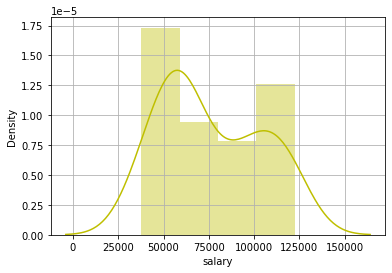

In [21]:
sns.distplot(df.salary,color='y')
plt.grid()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


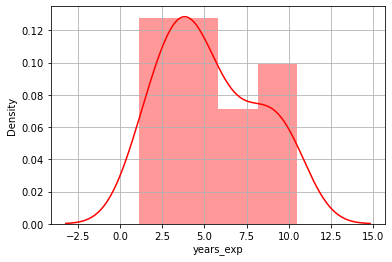

In [23]:
sns.distplot(df.years_exp,color='r')
plt.grid()

TypeError: 'str' object is not callable

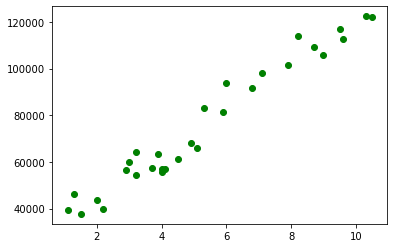

In [40]:
plt.scatter(df.years_exp,df.salary,color='g')
plt.xlabel('Years_Exp')
plt.ylabel('Salary')
plt.title("Scatter Plot")

 # Correlation Analysis

In [34]:
df.corr()

,years_exp,salary
years_exp,1.000000,0.978242
salary,0.978242,1.000000


<AxesSubplot:xlabel='years_exp', ylabel='salary'>

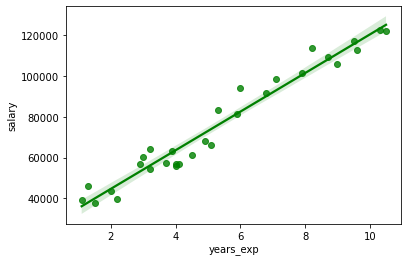

In [39]:
sns.regplot(x='years_exp',y='salary',data=df,color='g')

# Building Model

In [53]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [54]:
model=smf.ols('salary~years_exp',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        11:46:08   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years_exp   9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Coefficient parameter
model.params

Intercept    25792.200199
years_exp     9449.962321
dtype: float64

In [56]:
# p & t-value
print(model.pvalues)
print(model.tvalues)

Intercept    5.511950e-12
years_exp    1.143068e-20
dtype: float64
Intercept    11.346940
years_exp    24.950094
dtype: float64


In [57]:
# R-squared and adj.rsquared value
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [58]:
model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,21136.061314,30448.339084
years_exp,8674.118747,10225.805896


In [59]:
predi=model.predict(pd.DataFrame(df['years_exp']))    # Predicted values of salary using the model

In [60]:
predi.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [61]:
predi.corr(df.salary)

0.9782416184887601

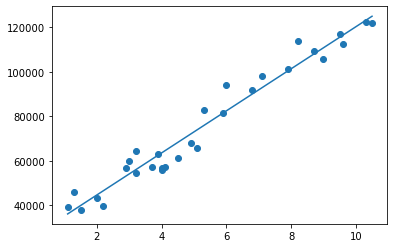

In [64]:
plt.scatter(df.years_exp,df.salary)
plt.plot(df.years_exp,predi)
plt.xlabel=('years_exp')
plt.ylabel=('salary')

In [65]:
rmse = np.sqrt(np.mean((predi-df.salary)**2)) 

In [66]:
rmse

5592.043608760661

In [67]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt

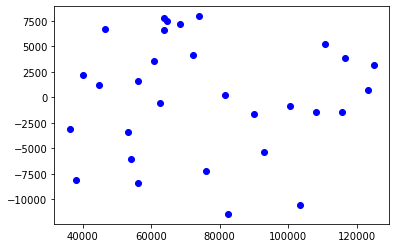

In [68]:
plt.scatter(predi,(predi-df.salary),c="b")


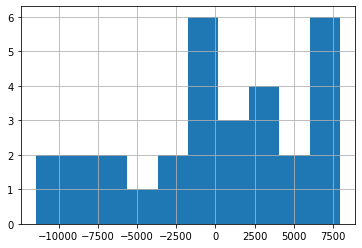

In [69]:
# checking normal distribution for residual
plt.hist(predi-df.salary)
plt.grid()

### Transforming Variables for accuracy

In [71]:
model2=smf.ols('salary~np.log(years_exp)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           3.25e-13
Time:                        11:52:12   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(years_exp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Coefficient parameter
model2.params

Intercept            14927.97177
np.log(years_exp)    40581.98796
dtype: float64

In [73]:
# p & t-value
print(model2.pvalues)
print(model2.tvalues)

Intercept            7.268813e-03
np.log(years_exp)    3.250155e-13
dtype: float64
Intercept             2.895135
np.log(years_exp)    12.791989
dtype: float64


In [74]:
# R-squared and adj.rsquared value
(model2.rsquared,model2.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

In [75]:
model2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,4365.921305,25490.022235
np.log(years_exp),34083.511736,47080.464184


In [77]:
predi2=model2.predict(pd.DataFrame(df['years_exp']))    # Predicted values of salary using the model

In [78]:
predi2.head()

0    18795.848339
1    25575.235192
2    31382.551905
3    43057.262306
4    46925.138875
dtype: float64

In [79]:
predi2.corr(df.salary)

0.9240610817882637

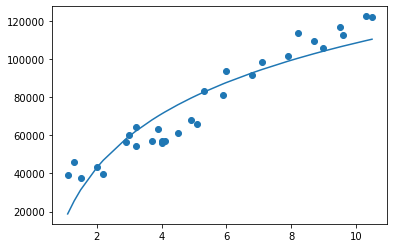

In [80]:
plt.scatter(df.years_exp,df.salary)
plt.plot(df.years_exp,predi2)
plt.xlabel=('years_exp')
plt.ylabel=('salary')

In [81]:
rmse2 = np.sqrt(np.mean((predi2-df.salary)**2)) 

In [82]:
rmse2

10302.893706228308

In [83]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt

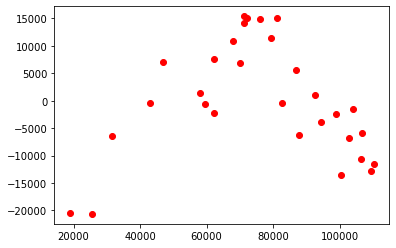

In [84]:
plt.scatter(predi2,(predi2-df.salary),c="r")


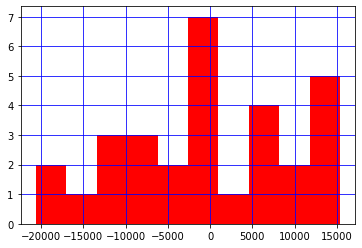

In [90]:
# checking normal distribution for residual
plt.hist(predi2-df.salary,color='r')
plt.grid(color='b')

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-20629.76480825, -20547.15166068, -13494.08131559, -12819.99275302,
         -11520.54585481, -10679.13156494,  -6711.07924947,  -6348.44809459,
          -6298.86702291,  -5920.18539981,  -3800.48530371,  -2496.62861049,
          -2314.056071  ,  -1486.28688755,   -638.15755875,   -481.17011761,
           -467.7376941 ,    982.50213746,   1494.05007933,   5596.06670394,
           6941.10586295,   7034.13887516,   7685.943929  ,  10833.71850448,
          11484.29572936,  14229.55284173,  14855.42257661,  15016.79173698,
          15107

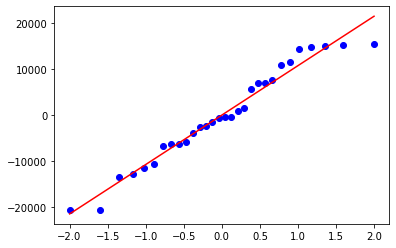

In [93]:
import pylab
import scipy.stats as st
st.probplot(predi2-df.salary,dist="norm",plot=pylab)

### Exponential Transformation

In [95]:
model3=smf.ols('np.log(salary)~years_exp',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           7.03e-18
Time:                        12:01:23   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
years_exp      0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Coefficient parameter
model3.params

Intercept    10.507402
years_exp     0.125453
dtype: float64

In [97]:
# p & t-value
print(model3.pvalues)
print(model3.tvalues)

Intercept    1.604634e-49
years_exp    7.027439e-18
dtype: float64
Intercept    273.327166
years_exp     19.584833
dtype: float64


In [98]:
# R-squared and adj.rsquared value
(model3.rsquared,model3.rsquared_adj)

(0.9319671194084195, 0.9295373736730059)

In [99]:
model3.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,10.428656,10.586148
years_exp,0.112332,0.138574


In [100]:
predi3=model3.predict(pd.DataFrame(df['years_exp']))    # Predicted values of salary using the model

In [102]:
predi3

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [111]:
predi4=np.exp(predi3)

In [112]:
predi4

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [113]:
predi4.corr(df.salary)

0.9660469705377085

TypeError: 'str' object is not callable

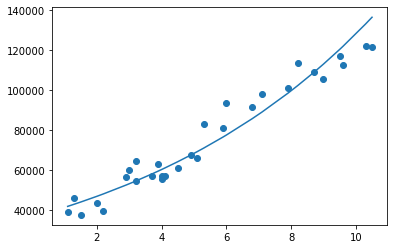

In [120]:
plt.scatter(df.years_exp,df.salary)
plt.plot(df.years_exp,predi4)
plt.xlabel('years_exp')
plt.ylabel('salary')

In [114]:
rmse3 = np.sqrt(np.mean((predi4-df.salary)**2)) 

In [115]:
rmse3

7213.235076620129

In [107]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt

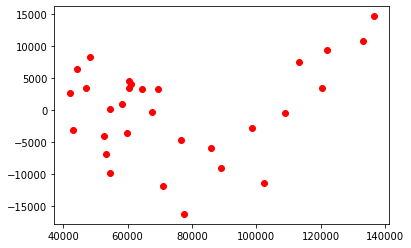

In [116]:
plt.scatter(predi4,(predi4-df.salary),c="r")


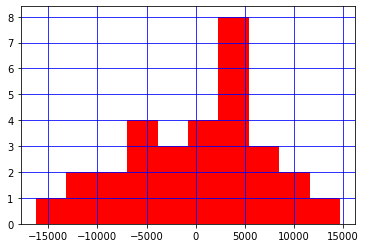

In [117]:
# checking normal distribution for residual
plt.hist(predi4-df.salary,color='r')
plt.grid(color='b')

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-16278.16496045, -11955.31536492, -11465.88948833,  -9786.98506533,
          -9119.27460674,  -6846.32461352,  -5877.29579198,  -4669.36922015,
          -4002.8575278 ,  -3543.01709697,  -3138.93320627,  -2736.19040851,
           -459.45924192,   -286.75385066,    213.01493467,   1007.33078806,
           2655.95746835,   3229.19929147,   3341.12871194,   3471.33845625,
           3494.02918883,   3506.81960119,   4110.20460439,   4634.33845625,
           6429.28922813,   7568.93336398,   8322.68847426,   9361.74383626,
          10803

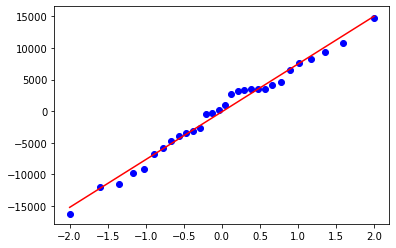

In [118]:
import pylab
import scipy.stats as st
st.probplot(predi4-df.salary,dist="norm",plot=pylab)

In [121]:
resid_3=predi-df.salary

In [122]:
resid_3.head()

0   -3155.841248
1   -8127.848783
2    2236.143681
3    1167.124842
4    6691.117306
dtype: float64

In [ ]:
# so we will consider the model having highest R-Squared value which is model
# getting residuals of the entire data set

In [123]:
s_resid = model.resid_pearson 


In [124]:
s_resid

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

TypeError: 'str' object is not callable

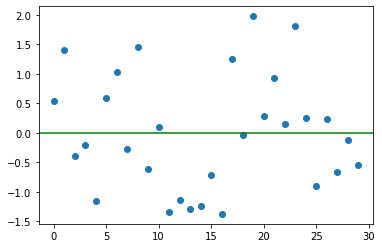

In [125]:
plt.plot(s_resid,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")


TypeError: 'str' object is not callable

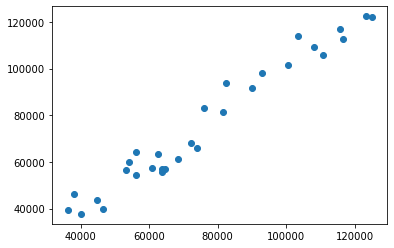

In [126]:
# Predicted vs actual values
plt.scatter(x=predi,y=df.salary)
plt.xlabel("Predicted")
plt.ylabel("Actual")
